# Projeto 1 - Relatório de fechamento de mercado por e-mail

## Desafio

* Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.

## Passo a passo:

`Passo 1` - Importar os módulos e bibliotecas;

`Passo 2` - Pegar dados do Ibovespa e do Dólar no Yahoo Finance;

`Passo 3` - Manipular os dados para deixá-los nos formatos necessários para fazer as contas;

`Passo 4` - Calcular o rertorno diário, mensal e anual;

`Passo 5` - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão para o texto anexado no e-mail;

`Passo 6` - Fazer os gráficos dos alvos;

`Passo 7` - Enviar o e-mail;

## Passo 1: Importando os módulos necessários

In [1]:
# Instalando o 'yfinance' na versão mais atual
# !pip install yfinance==0.1.74
# 
# !pip install mplcyberpunk
#
# !pip install python-dotenv

In [2]:
import pandas   as pd
import yfinance as yf
import datetime as dt
import mplcyberpunk
import smtplib
import os
from dotenv import load_dotenv
from matplotlib import pyplot as plt
from email.message import EmailMessage

## Passo 2: Pegar dados no Yahoo Finance

In [3]:
ativos = ["^BVSP", "BRL=X", "WEGE3.SA", "PETR4.SA"]

hoje = dt.datetime.now()
um_ano_atras = hoje - dt.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

[*********************100%***********************]  4 of 4 completed


In [4]:
display(dados_mercado)

Adj Close                                   Close             \
               BRL=X   PETR4.SA   WEGE3.SA     ^BVSP   BRL=X   PETR4.SA   
Date                                                                      
2022-04-05    4.5938  18.928839  34.055866  118885.0  4.5938  32.389999   
2022-04-06    4.6507  18.911306  33.760845  118228.0  4.6507  32.360001   
2022-04-07    4.7152  19.893106  33.554325  118862.0  4.7152  34.040001   
2022-04-08    4.7521  19.992453  33.573994  118322.0  4.7521  34.209999   
2022-04-11    4.6981  19.840508  32.010353  116953.0  4.6981  33.950001   
...              ...        ...        ...       ...     ...        ...   
2023-03-29    5.1644  23.900000  41.730000  101793.0  5.1644  23.900000   
2023-03-30    5.1342  23.969999  41.860001  103713.0  5.1342  23.969999   
2023-03-31    5.0927  23.450001  40.549999  101882.0  5.0927  23.450001   
2023-04-03    5.0623  24.490000  39.590000  101506.0  5.0623  24.490000   
2023-04-04    5.0631  24.270000  39.630001  101869.0  5.0631  24.270000   

                                     High             ...        Low  \
             WEGE3.SA     ^BVSP     BRL=X   PETR4.SA  ...   WEGE3.SA   
Date                                                  ...              
2022-04-05  34.630001  118885.0  4.669100  33.060001  ...  34.560001   
2022-04-06  34.330002  118228.0  4.712600  32.779999  ...  33.689999   
2022-04-07  34.119999  118862.0  4.769900  34.060001  ...  33.959999   
2022-04-08  34.139999  118322.0  4.791300  34.410000  ...  33.660000   
2022-04-11  32.549999  116953.0  4.732600  34.099998  ...  32.549999   
...               ...       ...       ...        ...  ...        ...   
2023-03-29  41.730000  101793.0  5.182300  24.040001  ...  41.270000   
2023-03-30  41.860001  103713.0  5.155928  24.280001  ...  41.060001   
2023-03-31  40.549999  101882.0  5.103300  24.219999  ...  40.450001   
2023-04-03  39.590000  101506.0  5.075500  24.500000  ...  39.299999   
2023-04-04  39.630001  101869.0  5.097600  24.760000  ...  39.250000   

                        Open                                 Volume  \
               ^BVSP   BRL=X   PETR4.SA   WEGE3.SA     ^BVSP  BRL=X   
Date                                                                  
2022-04-05  118794.0  4.5938  32.660000  35.020000  121279.0      0   
2022-04-06  116791.0  4.6507  32.599998  34.349998  118885.0      0   
2022-04-07  117509.0  4.7152  32.639999  34.330002  118226.0      0   
2022-04-08  117487.0  4.7521  34.070000  34.000000  118861.0      0   
2022-04-11  116953.0  4.6980  33.900002  33.709999  118320.0      0   
...              ...     ...        ...        ...       ...    ...   
2023-03-29  100248.0  5.1644  23.709999  41.480000  101185.0      0   
2023-03-30  101796.0  5.1342  24.250000  41.790001  101796.0      0   
2023-03-31  101476.0  5.0927  24.000000  41.919998  103714.0      0   
2023-04-03  100651.0  5.0623  24.090000  40.790001  101883.0      0   
2023-04-04  101505.0  5.0631  24.629999  39.860001  101505.0      0   

                                                 
               PETR4.SA    WEGE3.SA       ^BVSP  
Date                                             
2022-04-05   45847200.0   4841100.0  11788300.0  
2022-04-06   56947100.0   8243200.0  13410800.0  
2022-04-07  118469400.0   5002100.0  11520100.0  
2022-04-08   60772700.0   4997500.0  11225800.0  
2022-04-11   48125400.0   8741200.0   9558400.0  
...                 ...         ...         ...  
2023-03-29   49148600.0   7454100.0  12456100.0  
2023-03-30   56116900.0   5155400.0  14901600.0  
2023-03-31   59547800.0  10945300.0  15111200.0  
2023-04-03   73931200.0   8938800.0  12794800.0  
2023-04-04   57505700.0   6442000.0  11695800.0  

[261 rows x 24 columns]

## Passo 3: Manipulando os dados

### Passo 3.1: Seleção e exclusão de dados

In [5]:
# Selecionando os dados de fechamento
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.head()

,BRL=X,PETR4.SA,WEGE3.SA,^BVSP
Date,,,,
2022-04-05,4.5938,18.928839,34.055866,118885.0
2022-04-06,4.6507,18.911306,33.760845,118228.0
2022-04-07,4.7152,19.893106,33.554325,118862.0
2022-04-08,4.7521,19.992453,33.573994,118322.0
2022-04-11,4.6981,19.840508,32.010353,116953.0


In [6]:
# Alterando os nomes das colunas
dados_fechamento.columns = ['dolar', 'petrobras', 'wege', 'ibovespa']
dados_fechamento.head(20)

,dolar,petrobras,wege,ibovespa
Date,,,,
2022-04-05,4.5938,18.928839,34.055866,118885.0
2022-04-06,4.6507,18.911306,33.760845,118228.0
2022-04-07,4.7152,19.893106,33.554325,118862.0
2022-04-08,4.7521,19.992453,33.573994,118322.0
2022-04-11,4.6981,19.840508,32.010353,116953.0
2022-04-12,4.6936,19.782068,31.833340,116147.0
2022-04-13,4.6731,20.202839,32.020191,116782.0
2022-04-14,4.6902,19.992016,31.754665,116182.0
2022-04-15,4.7010,NaN,NaN,NaN


In [7]:
# Excluindo os dados faltantes 'NaN'
dados_fechamento = dados_fechamento.dropna()
dados_fechamento.head(20)

,dolar,petrobras,wege,ibovespa
Date,,,,
2022-04-05,4.5938,18.928839,34.055866,118885.0
2022-04-06,4.6507,18.911306,33.760845,118228.0
2022-04-07,4.7152,19.893106,33.554325,118862.0
2022-04-08,4.7521,19.992453,33.573994,118322.0
2022-04-11,4.6981,19.840508,32.010353,116953.0
2022-04-12,4.6936,19.782068,31.833340,116147.0
2022-04-13,4.6731,20.202839,32.020191,116782.0
2022-04-14,4.6902,19.992016,31.754665,116182.0
2022-04-18,4.7006,19.640383,31.380964,115687.0


### Passo 3.2: Criando tabelas com outros dataframes

In [8]:
# Buscando os dados de fechamento Mensal | Fim de cada semana
dados_fechamento_semanal = dados_fechamento.resample("W").last() # Utilizando o '.last()' para pegar o último dia de cada semana
dados_fechamento_semanal.head(5)

,dolar,petrobras,wege,ibovespa
Date,,,,
2022-04-10,4.7521,19.992453,33.573994,118322.0
2022-04-17,4.6902,19.992016,31.754665,116182.0
2022-04-24,4.6208,19.538088,30.790911,111078.0
2022-05-01,4.9378,19.359076,29.600975,107876.0
2022-05-08,5.0280,21.136429,26.699879,105135.0


In [9]:
# Buscando os dados de fechamento Mensal | Fim de cada mês
dados_fechamento_mensal = dados_fechamento.resample("M").last() # Utilizando o '.last()' para pegar o último dia de cada mês
dados_fechamento_mensal.head(5)

,dolar,petrobras,wege,ibovespa
Date,,,,
2022-04-30,4.9378,19.359076,29.600975,107876.0
2022-05-31,4.7524,21.416571,24.949390,111351.0
2022-06-30,5.1809,19.899031,26.054115,98542.0
2022-07-31,5.1827,24.330538,27.762081,103165.0
2022-08-31,5.1219,29.074512,28.009602,109523.0


In [10]:
# Buscando os dados de fechamento Anual | Fim de cada ano
dados_fechamento_anual = dados_fechamento.resample("Y").last() # Utilizando o '.last()' para pegar o último dia de cada ano

dados_fechamento_anual.head(5)

,dolar,petrobras,wege,ibovespa
Date,,,,
2022-12-31,5.2668,24.50,38.238911,110031.0
2023-12-31,5.0631,24.27,39.630001,101869.0


### Passo 3.3: Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos.

In [11]:
# A função 'pct_change' retorna o retorno do ativo (variação entre 2 períodos)
# Desta forma, dropamos o 1º período pois, não há variação em relação ao período ZERO

retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_ano

,dolar,petrobras,wege,ibovespa
Date,,,,
2023-12-31,-0.038676,-0.009388,0.036379,-0.074179


In [12]:
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_mes.head()

,dolar,petrobras,wege,ibovespa
Date,,,,
2022-05-31,-0.037547,0.106281,-0.157143,0.032213
2022-06-30,0.090165,-0.070858,0.044279,-0.115033
2022-07-31,0.000347,0.222700,0.065555,0.046914
2022-08-31,-0.011731,0.194980,0.008916,0.061629
2022-09-30,0.053554,-0.103220,0.137732,0.004693


In [13]:
retorno_na_semana = dados_fechamento_semanal.pct_change().dropna()
retorno_na_semana.head()

,dolar,petrobras,wege,ibovespa
Date,,,,
2022-04-17,-0.013026,-0.000022,-0.054189,-0.018086
2022-04-24,-0.014797,-0.022705,-0.030350,-0.043931
2022-05-01,0.068603,-0.009162,-0.038646,-0.028827
2022-05-08,0.018267,0.091810,-0.098007,-0.025409
2022-05-15,0.020963,0.036600,-0.023941,0.017016


In [14]:
retorno_no_dia = dados_fechamento.pct_change().dropna()
retorno_no_dia.tail()

,dolar,petrobras,wege,ibovespa
Date,,,,
2023-03-29,-0.006292,0.013141,0.008702,0.006009
2023-03-30,-0.005848,0.002929,0.003115,0.018862
2023-03-31,-0.008083,-0.021694,-0.031295,-0.017654
2023-04-03,-0.005969,0.044350,-0.023674,-0.003691
2023-04-04,0.000158,-0.008983,0.001010,0.003576


## Passo 4: Localizar o fechamento do dia anterior, retorno no mês e retorno no ano. 

* Loc -> referenciar elementos a partir do nome

* iloc -> selecionar elementos como uma matriz

In [15]:
# Buscando o RETORNO do último DIA
retorno_dia_dolar = retorno_no_dia.iloc[-1,0]*100
retorno_dia_petr = retorno_no_dia.iloc[-1,1]*100
retorno_dia_wege = retorno_no_dia.iloc[-1,2]*100
retorno_dia_ibov = retorno_no_dia.iloc[-1,3]*100

In [16]:
print('Dolar:     ', retorno_dia_dolar.round(4))
print('Petrobrás:  ', retorno_dia_petr.round(4))
print('Wege:      ', retorno_dia_wege.round(4))
print('Ibovespa:  ', retorno_dia_ibov.round(4))

Dolar:      0.0158
Petrobrás:   -0.8983
Wege:       0.101
Ibovespa:   0.3576


In [17]:
# Buscando o RETORNO do último dia SEMANA
retorno_semana_dolar = retorno_na_semana.iloc[-1,0]*100
retorno_semana_petr = retorno_na_semana.iloc[-1,1]*100
retorno_semana_wege = retorno_na_semana.iloc[-1,2]*100
retorno_semana_ibov = retorno_na_semana.iloc[-1,3]*100

In [18]:
print('Dolar:     ', retorno_semana_dolar.round(4))
print('Petrobrás:  ', retorno_semana_petr.round(4))
print('Wege:      ', retorno_semana_wege.round(4))
print('Ibovespa:  ', retorno_semana_ibov.round(4))

Dolar:      -0.5812
Petrobrás:   3.4968
Wege:       -2.2688
Ibovespa:   -0.0128


In [19]:
# Buscando o RETORNO do último dia MÊS
retorno_mes_dolar = retorno_no_mes.iloc[-1,0]*100
retorno_mes_petr = retorno_no_mes.iloc[-1,1]*100
retorno_mes_wege = retorno_no_mes.iloc[-1,2]*100
retorno_mes_ibov = retorno_no_mes.iloc[-1,3]*100

In [20]:
print('Dolar:     ', retorno_mes_dolar.round(4))
print('Petrobrás:  ', retorno_mes_petr.round(4))
print('Wege:      ', retorno_mes_wege.round(4))
print('Ibovespa:  ', retorno_mes_ibov.round(4))

Dolar:      -0.5812
Petrobrás:   3.4968
Wege:       -2.2688
Ibovespa:   -0.0128


In [21]:
# Buscando o RETORNO do último ANO
retorno_ano_dolar = retorno_no_ano.iloc[-1,0]*100
retorno_ano_petr = retorno_no_ano.iloc[-1,1]*100
retorno_ano_wege = retorno_no_ano.iloc[-1,2]*100
retorno_ano_ibov = retorno_no_ano.iloc[-1,3]*100

In [22]:
print('Dolar:     ', retorno_ano_dolar.round(4))
print('Petrobrás:  ', retorno_ano_petr.round(4))
print('Wege:      ', retorno_ano_wege.round(4))
print('Ibovespa:  ', retorno_ano_ibov.round(4))

Dolar:      -3.8676
Petrobrás:   -0.9388
Wege:       3.6379
Ibovespa:   -7.4179


## Passo 5: Fazer os gráficos da performance do último dos ativos

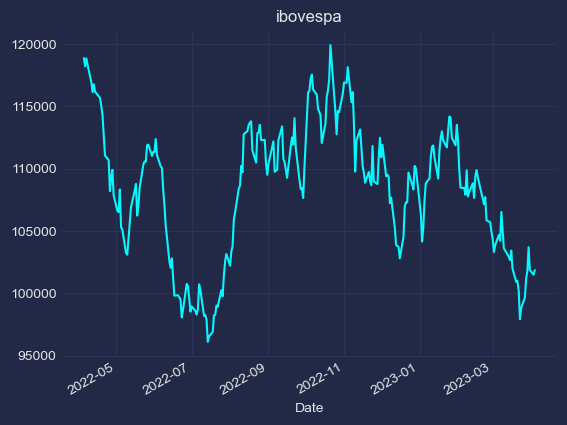

In [23]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y= 'ibovespa', use_index = True, legend=False)
plt.title('ibovespa')
plt.savefig('ibovespa.png', dpi=300)
plt.show()

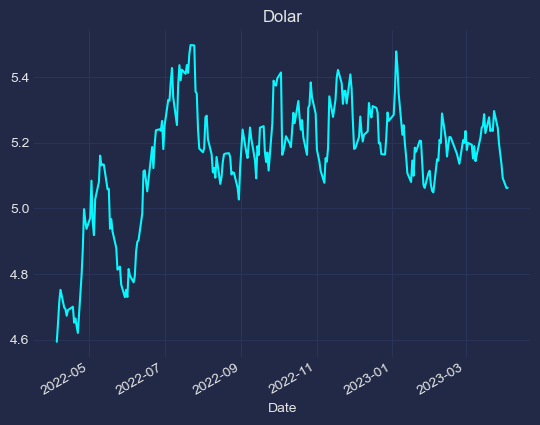

In [24]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y= 'dolar', use_index = True, legend=False)
plt.title('Dolar')
plt.savefig('dolar.png', dpi=300)
plt.show()

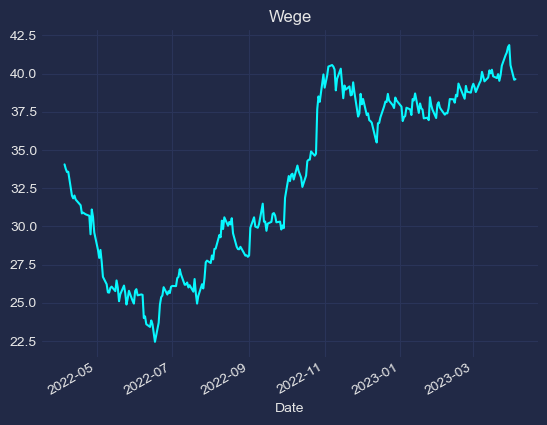

In [25]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y= 'wege', use_index = True, legend=False)
plt.title('Wege')
plt.savefig('wege.png', dpi=300)
plt.show()

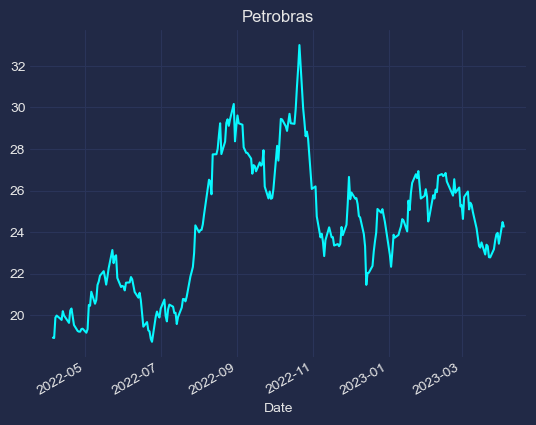

In [26]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y= 'petrobras', use_index = True, legend=False)
plt.title('Petrobras')
plt.savefig('petrobras.png', dpi=300)
plt.show()

## Passo 6: Enviar e-mail

https://myaccount.google.com/apppasswords

In [27]:
load_dotenv()

True

In [28]:
senha = os.environ.get("senha_email")
email = 'fabiano1.adm@gmail.com'

In [32]:
msg = EmailMessage()
msg['Subject'] = 'Enviando e-mail com o Python'
msg['From'] = 'fabiano1.adm@gmail.com'
msg['To'] = 'fabiano1.adm@gmail.com'

msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa esté tendo uma rentabilidade de {round(retorno_ano_ibov, 4)}%, enquanto no mês a 
rentabilidade é de {round(retorno_mes_ibov,4)}%.
Na última semana o valor de fechamento foi de {round(retorno_semana_ibov, 4)}%, enquanto que no último dia útil, o 
fechamento do Ibovespa foi de {round(retorno_dia_ibov, 4)}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {round(retorno_ano_dolar, 4)}%, enquanto no mês a 
rentabilidade é de {round(retorno_mes_ibov, 4)}%.
Na última semana o valor de fechamento foi de {round(retorno_semana_dolar, 4)}%, enquanto que no último dia útil, o 
fechamento do Dólar foi de {round(retorno_dia_dolar, 4)}%.

Petr4:
Fechamento do Ano:     {round(retorno_ano_petr, 4)}%
Fechamento do Mês:     {round(retorno_mes_petr, 4)}%
Fechamento da Semana:  {round(retorno_semana_petr, 4)}%
Fechamento do Dia:     {round(retorno_dia_petr, 4)}%

Wege:
Fechamento do Ano:     {round(retorno_ano_wege, 4)}%
Fechamento do Mês:     {round(retorno_mes_wege, 4)}%
Fechamento da Semana:  {round(retorno_semana_wege, 4)}%
Fechamento do Dia:     {round(retorno_dia_wege, 4)}%


Abs,

Dpto. Ciência de Dados
''')

In [33]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')

with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

with open('petrobras.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='petrobras.png')

with open('wege.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='wege.png')


In [34]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    
    smtp.login(email, senha)
    smtp.send_message(msg)